Important relations among different columns in the dataframe above:
    
#### These relations are analyzed regardless of the existing rate at the country level (everything will be examined globally)"
- distribution of suicide between different age range for males in different years 
- compare this distribution with that of women 
- how HDI (Human Development Index) can affect the suicide rate?

    `Make inference`

#### These relations are analyzed at the country level"

- which countries show more suicide rate among different genders?
    
    `Requires another CSV file to be downloaded`

- barplot for countries cmparing the rate between the youngest and oldest age range 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./master.csv')
df = df.drop(['HDI for year'],  axis=1)
print('The number of training examples before dropna: ', len(df))
df = df.dropna()
print('The number of training examples after dropna: ', len(df))
print('Total number of features: ', len(df.columns))
df.head()

The number of training examples before dropna:  27820
The number of training examples after dropna:  27820
Total number of features:  11


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [3]:
for col in df.columns:
    print('Number of unique {}:'.format(col), len(np.unique(df[col])))

Number of unique country: 101
Number of unique year: 32
Number of unique sex: 2
Number of unique age: 6
Number of unique suicides_no: 2084
Number of unique population: 25564
Number of unique suicides/100k pop: 5298
Number of unique country-year: 2321
Number of unique  gdp_for_year ($) : 2321
Number of unique gdp_per_capita ($): 2233
Number of unique generation: 6


In [4]:
for col in df.columns:
    print(col, '---',df[col].dtype)

country --- object
year --- int64
sex --- object
age --- object
suicides_no --- int64
population --- int64
suicides/100k pop --- float64
country-year --- object
 gdp_for_year ($)  --- object
gdp_per_capita ($) --- int64
generation --- object


In [5]:
gdp = []
# convert gdp_for_year from string to ints 
for i, string in enumerate(df[df.columns[8]]):
    gdp.append(int(string.replace(',','')))

# put the results in a new column    
gdp_frame =pd.DataFrame()
gdp_frame['gdp'] = np.array(gdp)
new = pd.concat((df,gdp_frame),axis=1)

In [6]:
def suicide_gdp(df, *country):
    assert len(country) % 2 ==0
    x = 2
    y = int(len(country)/2)
    w = 0
    
    fig, ax= plt.subplots(x,y, figsize=(10,8))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    for m in range(x):
        for n in range(y):
            
            p1 = df[df['country'] == country[w]]
            sui_num = []
            gdp = []
            for year in p1['year'].unique():
                p2 = p1[p1['year'] == year]
                sui_num.append(sum(p2.suicides_no))
                gdp.append(np.average(p2['gdp']))

            X = []
            Y = []
            for i,j in sorted(zip(gdp,sui_num)):
                X.append(i)
                Y.append(j)

            ax[m,n].scatter(X,Y)
            ax[m,n].set_title(str(country[w]))
            
            
            
            w+=1
    for ax in ax.flat:
        ax.set(xlabel='GDP', ylabel='Suicide Count')
        
    
    plt.show()


    
    

In [7]:
def barplot(frame, col_x, col_y, country):
    reduced  = frame.where(frame['country'] == country)
    reduced = reduced.dropna()
    x_axis = reduced[col_x]
    y_axis = np.array(reduced[col_y])
    print('Number of data: ',len(y_axis))
    dict = {}
    for ind , val in enumerate(x_axis):
        if val not in dict:
            dict[val] = 0
            dict[val] += y_axis[ind]
        else:
            dict[val] += y_axis[ind]
    
    lists = list(dict.items())
    x,y = zip(*lists)
    x = list(x)
    y = list(y)
   

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y)
    plt.title('{} vs. {} in {}'.format(col_y, col_x, country))
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(True)
    plt.show()

In [8]:
def categorize(column):
    dict = {}
    key = int(1)
    for i in np.unique(column):
        if i not in dict:
            dict[i] = key
            key+=1
    return dict

In [9]:
def suicide_gender_year(df, gender):
    
    df2 = df[df['sex'] == gender]
    dict = {}
    count =  np.array(df2['suicides_no'])
    for ind, y in enumerate(df2['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y)
    plt.title('{} Suicide Rate over different Years'.format(gender))
    plt.xlabel('Year')
    plt.ylabel('counts')
    plt.grid(True)
    plt.show()
    

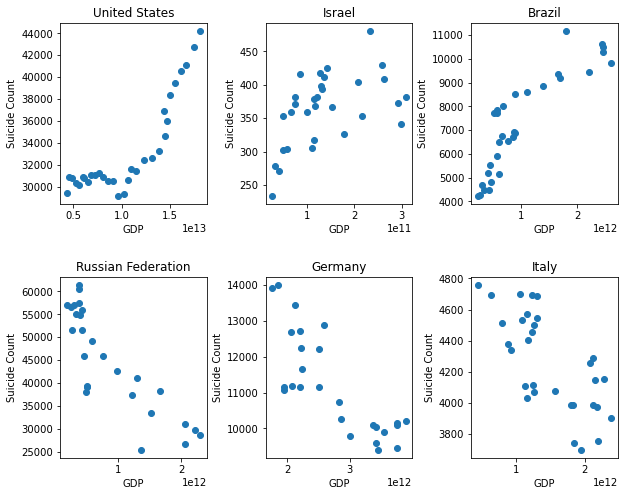

In [10]:
suicide_gdp(new, 'United States','Israel', 'Brazil', 'Russian Federation', 'Germany', 'Italy')

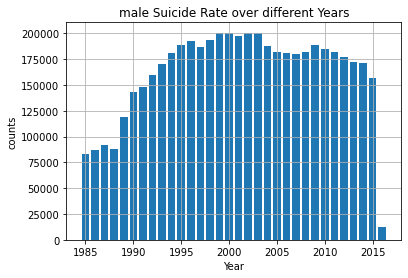

In [11]:
suicide_gender_year(df, 'male')

In [12]:
cont = pd.read_csv('./countryContinent.csv',encoding = "ISO-8859-1")

In [13]:
list = []
count_list = []
for country in df['country']:
    if country not in count_list:
        count_list.append(country)
        if country == 'Saint Vincent and Grenadines':
            country = 'Saint Vincent and the Grenadines'
        elif country == 'United Kingdom':
            country = 'United Kingdom of Great Britain and Northern Ireland'
        elif country == 'United States':
            country = 'United States of America'
        elif country == 'Macau':
            country = 'Macao'
        elif country == 'Republic of Korea':
            country = "Korea (Democratic People's Republic of)"
    
        list.append(cont[cont['country'] == country].continent.to_list()[0])

cont_dict = {}         
for i in range(len(count_list)):   
    cont_dict[count_list[i]] = list[i]


new_col = pd.DataFrame()
new_col['continent'] = df['country']
new_col = new_col.replace({"continent": cont_dict})

new_df = pd.concat((new_col, df), axis=1)
new_df.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Europe,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Europe,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Europe,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Europe,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Europe,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


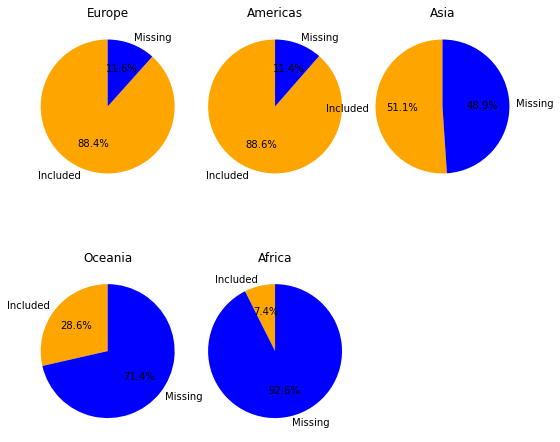

In [14]:
# country percentage:
actual = {'Europe': 43, 'Americas': 35, 'Asia': 47, 'Oceania': 14, 'Africa': 54}
dict1 = {}
df_count = new_df[['continent','country']]
category_dict = categorize(df_count['continent'])
df_count = df_count.replace({"continent": category_dict})

df_count = df_count.groupby(['country']).mean()
new_dict = dict([(value, key) for key, value in category_dict.items()])
df_count = df_count.replace({"continent": new_dict})

for c in df_count['continent']:
    if c not in dict1:
        dict1[c] = 1
    else:
        dict1[c] +=1 
        
        
fig, ax =  plt.subplots(2,3, figsize = (9,9))

iterable = iter(dict1)
for i in range(2):
    for j in range(3):
        
        try:
            cont = next(iterable)
            labels= ['Included', 'Missing']
            colors=['orange','blue']
            sizes= [dict1[cont], actual[cont]-dict1[cont]]
            ax[i,j].pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
            ax[i,j].set_title(cont)
            plt.axis('equal')
        except:
            fig.delaxes(ax[i, j])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

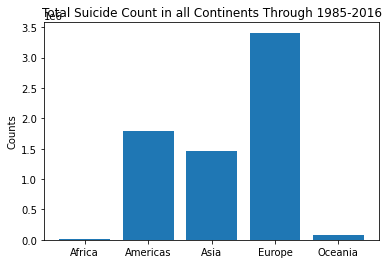

In [15]:
cont_list = []
count_list = []
for cont in np.unique(new_df['continent']):
    cont_list.append(cont)
    count_list.append(np.sum(new_df[new_df['continent']== cont].suicides_no))
plt.bar(cont_list, count_list)
plt.title('Total Suicide Count in all Continents Through 1985-2016')
plt.ylabel('Counts')
plt.show()

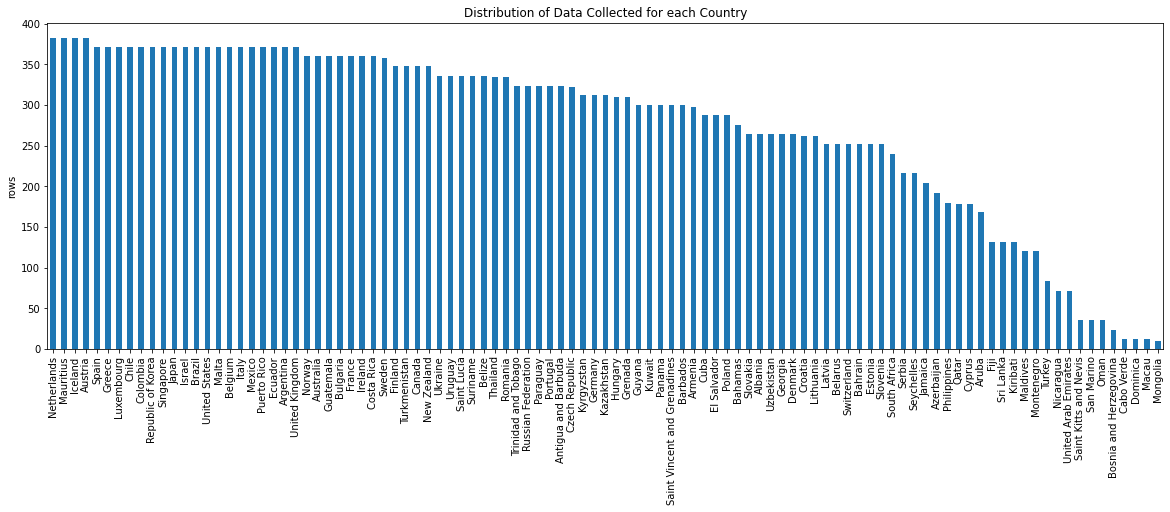

In [16]:
fig = plt.figure(figsize=(20,6))
df['country'].value_counts().plot(kind='bar')
plt.title("Distribution of Data Collected for each Country")
plt.ylabel('rows')
plt.show()

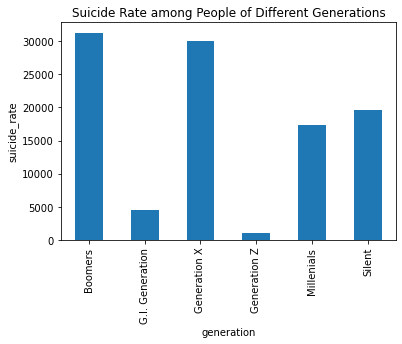

In [106]:
period = pd.DataFrame({'period': [2016-1943, 2016-1901, 2016-1965, 2016-2001,2016-1980, 2016-1925]})
time = pd.DataFrame({'time': [1943, 1901, 1965, 2001,1980, 1925]})
df1 = df[['suicides_no', 'generation']]
df1 = df1.groupby(['generation']).agg(sum)
df1.reset_index(inplace=True)
df2 = pd.concat((df1,period), axis=1)
df2 = pd.concat((df2,time), axis=1)
df2 =df2.set_index('generation')

df2['normalized']= df2['suicides_no']/df2['period']
df2['normalized'].plot.bar()
plt.title('Suicide Rate among People of Different Generations')
plt.ylabel('suicide_rate')
plt.show()

In [108]:
df2

,suicides_no,period,time,normalized
generation,,,,
Boomers,2284498,73,1943,31294.493151
G.I. Generation,510009,115,1901,4434.860870
Generation X,1532804,51,1965,30054.980392
Generation Z,15906,15,2001,1060.400000
Millenials,623459,36,1980,17318.305556
Silent,1781744,91,1925,19579.604396
